Here I am performing the multiple linear regression on the magnetic moment data. I will be using a leave one out cross validation method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics

%store -r magnetic_data_ohe

linreg = LinearRegression()
loocv = model_selection.LeaveOneOut()

In [2]:
# Format estimator and Target data
estimator = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns != 'Magnetic Moment']
predictor = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns == 'Magnetic Moment']

X_train, X_test, y_train, y_test = model_selection.train_test_split(estimator, predictor, test_size=0.25, random_state=24601)
y_train = y_train.as_matrix(); y_test = y_test.as_matrix();
X_train = X_train.as_matrix(); X_test = X_test.as_matrix();

In [3]:
model_train = linreg.fit(X_train, y_train) # train the model

In [4]:
# print out coefficients of linear model
for idx, col_name in enumerate(estimator.columns):
    print("The coefficient for {} is {}".format(col_name, model_train.coef_[0][idx]))

The coefficient for U Level is 0.07534210340079375
The coefficient for Total D Electrons is -0.09373737545446274
The coefficient for D Spin State is 2.63326578063998
The coefficient for Molecule_F16MPc is -0.2713081391232846
The coefficient for Molecule_MPc is 0.2713081391232855
The coefficient for Calc Type_metal is -0.4023418273950149
The coefficient for Calc Type_total is 0.40234182739501534


In [5]:
cv_results = model_selection.cross_val_score(model_train,
                                             X_train,
                                             y_train.ravel(),
                                             cv = loocv,
                                             scoring = 'neg_mean_squared_error')
# score the cross validation using the mean squared error

In [6]:
print('Leave-one-out cross validation mean:', -cv_results.mean())
print('Leave-one-out cross validation variance:', cv_results.var())

Leave-one-out cross validation mean: 1.11754090831
Leave-one-out cross validation variance: 1.44602938779


In [7]:
print('R-squared of train data:',model_train.score(X_train, y_train))
print('R-squared of test data:', linreg.score(X_test, y_test))

R-squared of train data: 0.698742804285
R-squared of test data: 0.362459558583


In [8]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
# Generated predicted data to plot in next section

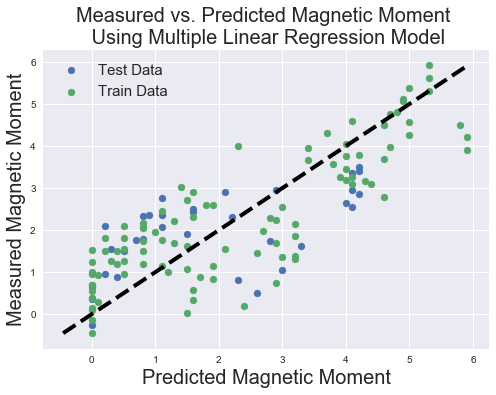

In [9]:
plt.style.use('seaborn')
# Compare the known vs. predicted magnetic moment

fig, ax = plt.subplots()
plt.scatter(x=y_test, y=y_test_pred, label = "Test Data") # plot the test data
plt.scatter(x=y_train, y=y_train_pred, label = "Train Data") # plot the training data
ax.plot([y_train_pred.min(), y_train_pred.max()], [y_train_pred.min(), y_train_pred.max()], 'k--', lw=4)
    # plot a line that would indicate perfect prediction. 

plt.title('Measured vs. Predicted Magnetic Moment \n Using Multiple Linear Regression Model', fontsize=20)
ax.set_xlabel('Predicted Magnetic Moment', fontsize = 20)
ax.set_ylabel('Measured Magnetic Moment', fontsize = 20)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [10]:
import statsmodels.api as sm
sm_model = sm.OLS(y_test, X_test).fit()
sm_model.summary()
# print out some more statistics information, but not sure how to use it in the analysis. 

C:\Users\Vincent\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7.725
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           0.000128
Time:                        16:41:03   Log-Likelihood:                -44.826
No. Observations:                  33   AIC:                             101.7
Df Residuals:                      27   BIC:                             110.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0130      0.056     -0.233      0.818      -0.128       0.102
x2            -0.2215      0.063     -3.528      0.002      -0.350      -0.093
x3             2.6502      0.552      4.797      0.000       1.517       3.784
x4             1.0669      0.333      3.205      0.003       0.384       1.750
x5             1.0411      0.350      2.972      0.006       0.322       1.760
x6             1.0886      0.356      3.054      0.005       0.357       1.820
x7             1.0194      0.334      3.056      0.005       0.335       1.704
==============================================================================
Omnibus:                        1.615   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.055
Skew:                          -0.062   Prob(JB):                        0.590
Kurtosis:                       2.133   Cond. No.                     5.74e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
# generate data for a learning curve
train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator = linreg, 
                                                        X = X_train, 
                                                        y = y_train.ravel(),
                                                        scoring='neg_mean_squared_error',
                                                        random_state = 24601,
                                                        cv = loocv
                                                       )

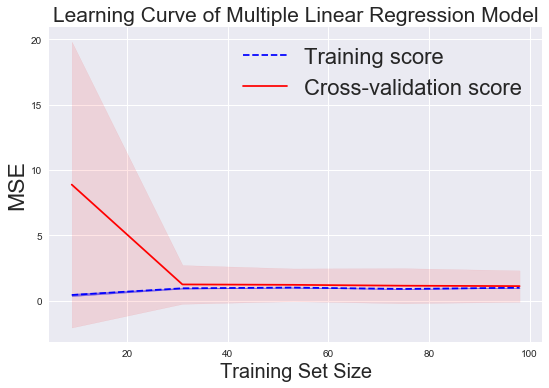

In [12]:
plt.style.use('seaborn')
# Plot a learning curve

# Training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color='b',  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="b",alpha = 0.5)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="r",alpha = 0.1)

# Create plot
plt.title("Learning Curve of Multiple Linear Regression Model", Fontsize = 21)
plt.xlabel("Training Set Size", fontsize = 20), plt.ylabel("MSE", fontsize = 23), plt.legend(loc="best", fontsize = 22)
plt.tight_layout()
plt.show()